In [78]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def f(function, x, x1, x2, d1, d2):
  return eval(function, {"__builtins__": {}, "x": x, "x1": x1, "x2": x2, "d1": d1, "d2": d2}, ALLOWED_NAMES)

def deriv_f(function, x, h, x1, x2, d1, d2):
  return (f(function, x + h, x1, x2, d1, d2) - f(function, x - h, x1, x2, d1, d2))/(2*h)

def deriv2_f(function, x, h, x1, x2, d1, d2):
  return (f(function, x-h, x1, x2, d1, d2) + f(function, x+h, x1, x2, d1, d2) - 2*f(function, x, x1, x2, d1, d2))/(h**2)

def newtonSearch(function, x, x1, x2, d1, d2):
  lmbda = x
  lmbda_next = 0
  e = 1e-6
  h = 1e-6
  timeout = 100
  time = 0

  while time < timeout:
    firstDeriv = deriv_f(function, lmbda, h, x1, x2, d1, d2)
    secondDeriv = deriv2_f(function, lmbda, h, x1, x2, d1, d2)

    if secondDeriv == 0.0:
      print("Derivada segunda nula!!!")
      break
    
    lmbda_next = lmbda - (firstDeriv / secondDeriv)

    print(x1, x2, d1, d2, firstDeriv, secondDeriv)

    if math.fabs(lmbda_next - lmbda) < e:
      break
    else:
      lmbda = lmbda_next

    time += 1
    
  return [lmbda_next, f(function, lmbda_next, x1, x2, d1, d2)]

In [79]:


def plot3D(function, min):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    x1 = np.arange(-5, 5, 0.15)
    x2 = np.arange(-5, 5, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    ax.contour(x1, x2, z, zdir='z', offset=0)
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')



0 1 1 0 0.0 2.0
Derivada segunda nula!!!
[0. 1.]


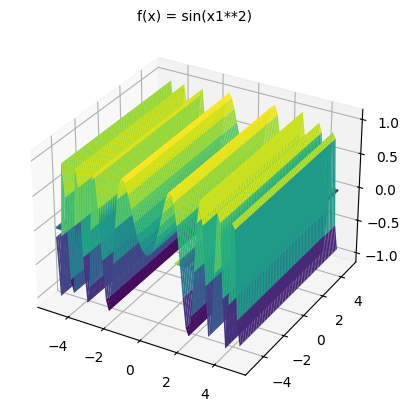

In [80]:
def hookeJeeves(function, initialValue, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
        [[1,0], 
        [0,1]]
    )

    e = 1e-6
    k = 0
    timeout = 100
    time = 0
    
    while time < timeout:
        start = np.array([x1, x2])
        end = np.array([0, 0])

        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            [x, y] = newtonSearch(nextFunc, x1 if k == 0 else x2, x1, x2, d1, d2)

            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            if k == dim-1:
                end = np.array([x1, x2])

        resultd = end - start

        if LA.norm(resultd) < e:
            break
        
        d1, d2 = resultd[0], resultd[1]

        [x, y] = newtonSearch(nextFunc, x2, x1, x2, d1, d2)

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        time += 1

    return end
    
function = "sin(x1**2)"
initialValue = np.array([0, 1])

min = hookeJeeves(function, initialValue, 2)

print(min)

plot3D(function, min)